TP DE MACHINE LEARNING !!!

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('WineQT.csv')

VISUALISATION DES DONNEES

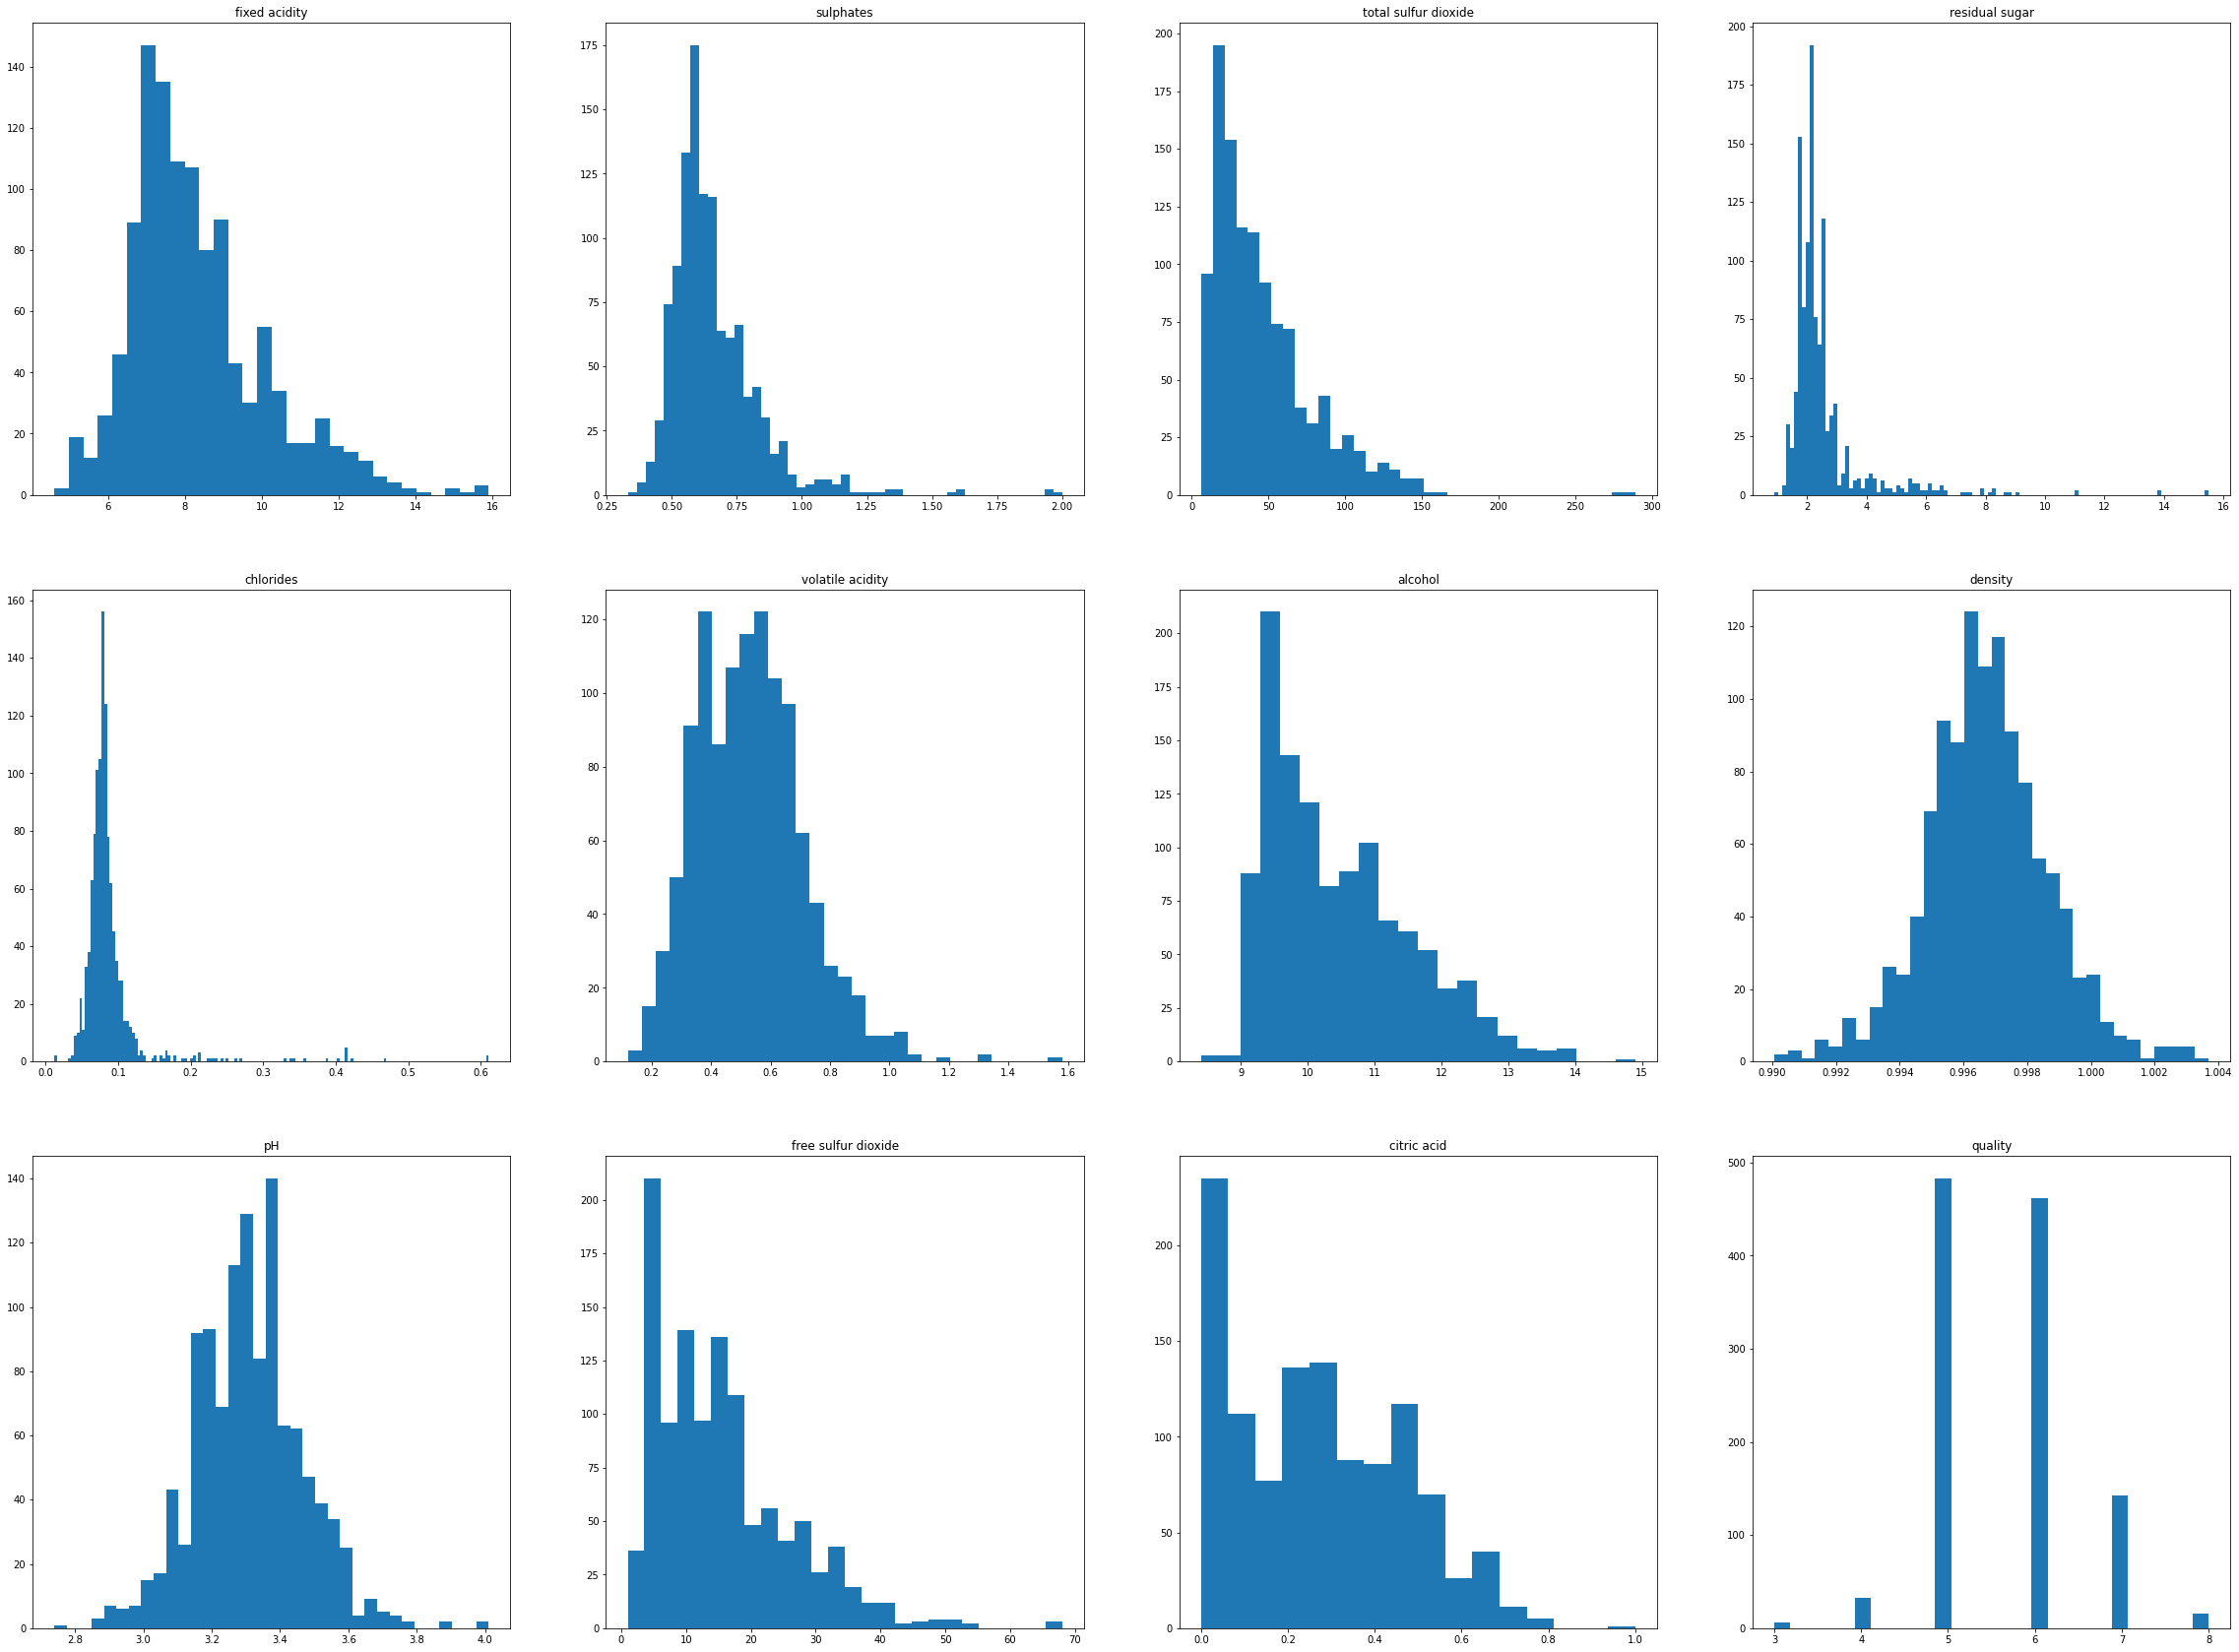

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(40, 30))
for n in range(12):
    i = n % 3
    j = n % 4
    ax[i, j].hist(df.iloc[:, n], bins='auto')
    ax[i, j].set_title(df.columns[n])

In [14]:
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['residual sugar'] = np.log(df['residual sugar'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])

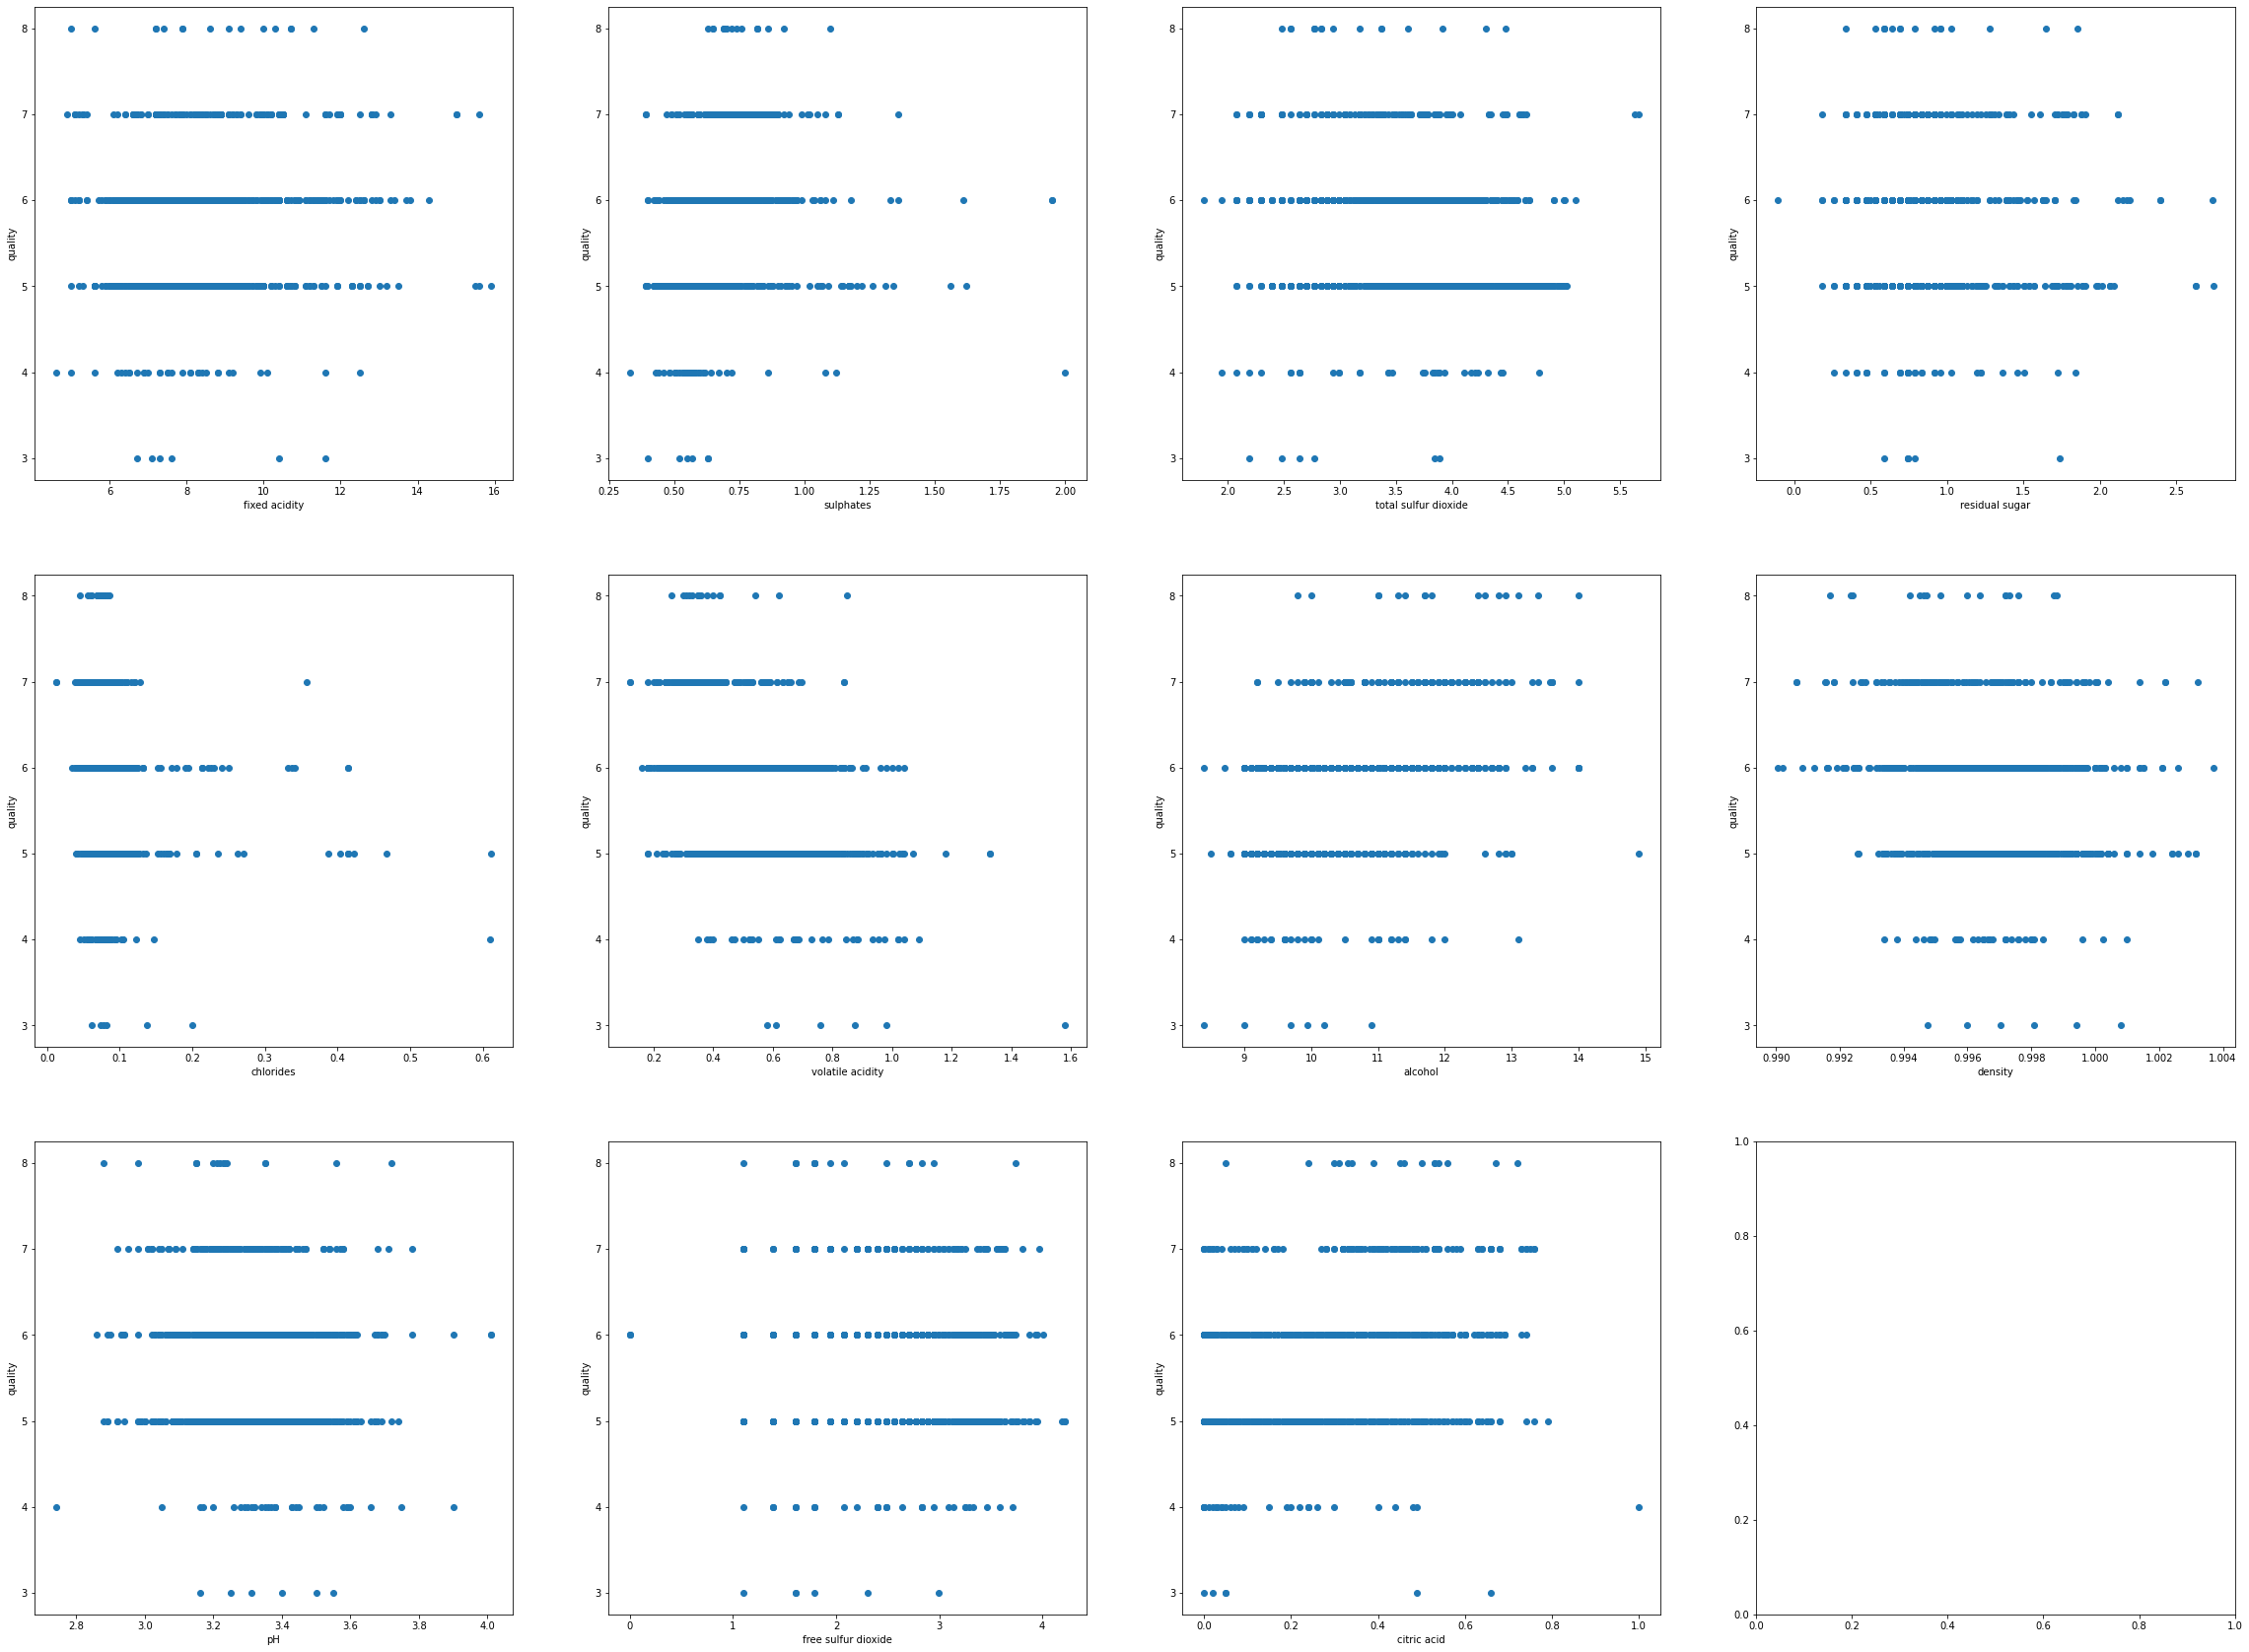

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(40, 30))
for n in range(11):
    i = n % 3
    j = n % 4
    ax[i, j].scatter(df.iloc[:, n], df['quality'])
    ax[i, j].set_xlabel(df.columns[n])
    ax[i, j].set_ylabel('quality')

<AxesSubplot:>

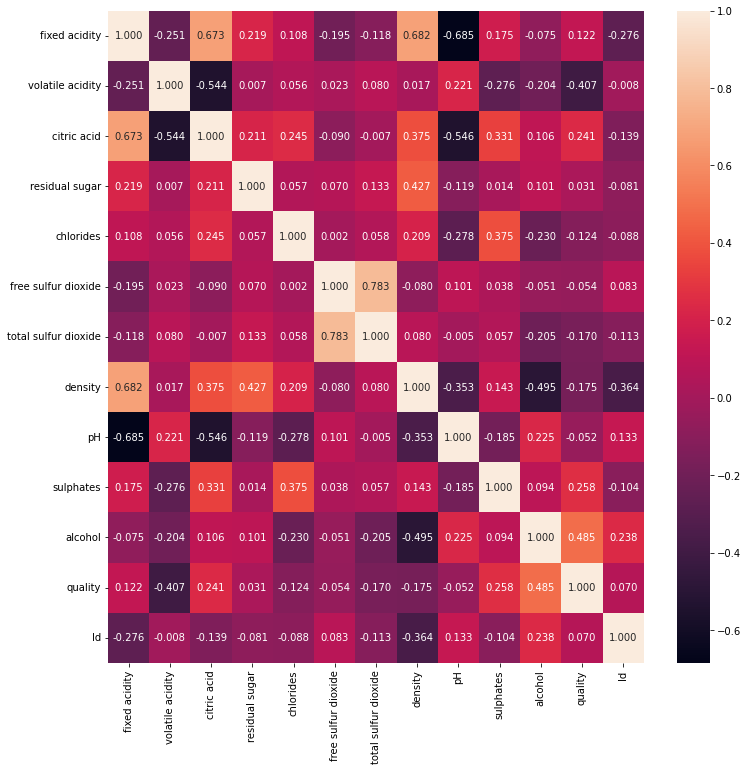

In [16]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.3f')

PREMIERE METHODE : POSED LINEAR PROBLEM

VOIR LES VARIABLES : ON SE CONCENTRE SUR ['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']

[[0.7  9.4  0.56 0.  ]]
[5 5 5 ... 5 6 5]
1143
1143


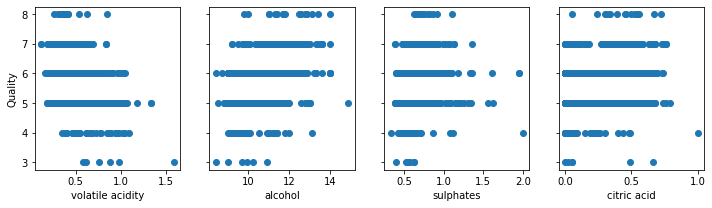

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# load the dataset

y_train = df['quality']
X_train= [df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]
X_features = ['volatile acidity','alcohol','sulphates','citric acid']
X_train=np.transpose(np.asmatrix(X_train))
y_train=np.asarray(y_train)
print(X_train[:1])
print(y_train)
print(len(X_train))
print(len(y_train))
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter([X_train[:,i]],[y_train])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Quality")
plt.show()


NORMALISATION

In [18]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

# normalize the original features



In [19]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(X_norm)

X_mu = [[ 0.53133858 10.4421114   0.65770779  0.26836395]], 
X_sigma = [[0.1795546  1.0817221  0.17032416 0.19659979]]
Peak to Peak range by column in Raw        X:[[1.46 6.5  1.67 1.  ]]
Peak to Peak range by column in Normalized X:[[8.13123157 6.00893702 9.80483344 5.08647531]]
[[ 0.93933222 -0.96338181 -0.57365783 -1.36502663]
 [ 1.94181282 -0.59360107  0.1308811  -1.36502663]
 [ 1.27349242 -0.59360107 -0.04525363 -1.16156762]
 ...
 [ 0.38239855  0.05351522 -0.45623467 -0.9581086 ]
 [ 0.10393172  0.70063152  0.60057372 -0.8563791 ]
 [ 0.6330187  -0.22382033  0.30701583 -0.75464959]]


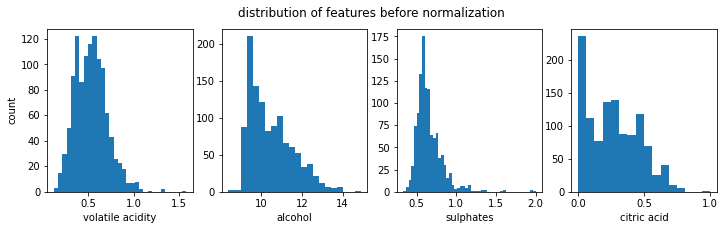

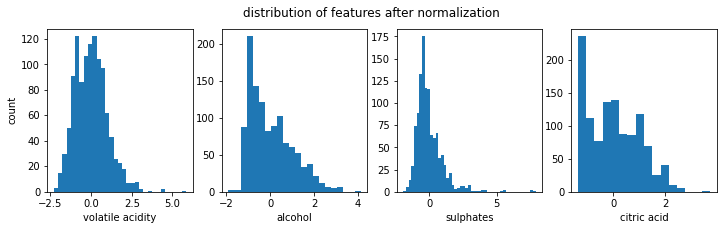

In [20]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(X_train[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))

for i in range(len(ax)):
    ax[i].hist(X_norm[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

MODIFICATION DU JEU DE DONNEES :

on a trop de vins de qualité égales à 5 ou 6... le modèle se concentre sur des notes de 5 et 6 pour que la somme des erreures soit minimale. On va modifier le jeu de données pour avoir une répartition plus homogène.

(579,)
(579, 4)


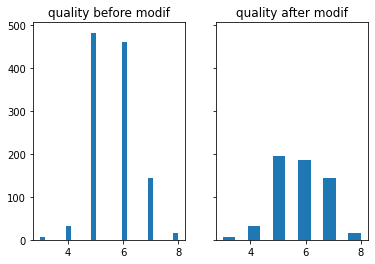

In [21]:
import random


fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(df["quality"], bins='auto',label="quality")
ax[0].set_title("quality before modif")
supp=[]
#on supprime aleatoirement des valeurs de notes 5 et 6 (diviser par 3)
for i in range(len(y_train)):
    if y_train[i]==5 or y_train[i]==6:
        rand=random.random()
        if(rand>0.4):
            supp.append(i)
for j in range(len(supp)):
    y_train2=np.delete(y_train,supp)
    X_norm2=np.delete(X_norm,supp,0)


ax[1].hist(y_train2, bins='auto',label="quality")
ax[1].set_title("quality after modif")

print(y_train2.shape)
print(X_norm2.shape)
X_norm=X_norm2
y_train=y_train2

DESCENTE DE GRADIENT : 

Codes

In [22]:
import copy
import math


def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                    
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                      
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        # if i% math.ceil(num_iters / 10) == 0:
            
           # print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, np.squeeze(J_history) #return final w,b and J history for graphing

application:

In [23]:
# initialize parameters
b_init = 0
w_init = np.array([ 0,0,0,0])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 200


w_init shape: (4,), b_init type: <class 'int'>


INFLUENCE DE L'HYPERPARAMETRE ALPHA

b,w found by gradient descent: [[5.68884191]],[-0.29221754  0.40936441  0.16137984  0.06144014] 
prediction: [[4.8435341]], target value: 5
prediction: [[4.8435341]], target value: 5
prediction: [[4.90863242]], target value: 5
prediction: [[5.06669583]], target value: 7
prediction: [[5.09239795]], target value: 7
prediction: [[4.96919288]], target value: 5
prediction: [[5.13318741]], target value: 5
prediction: [[6.29837798]], target value: 7
prediction: [[6.03835552]], target value: 6
prediction: [[5.71803964]], target value: 5
prediction: [[5.36020447]], target value: 5
prediction: [[5.45676854]], target value: 5
prediction: [[5.11284395]], target value: 6
prediction: [[5.15205316]], target value: 5
prediction: [[5.72642847]], target value: 7
prediction: [[4.99854134]], target value: 4
prediction: [[6.58357302]], target value: 4
prediction: [[5.25732514]], target value: 6
prediction: [[5.47682556]], target value: 5
prediction: [[5.56870236]], target value: 6
prediction: [[5.42597557]

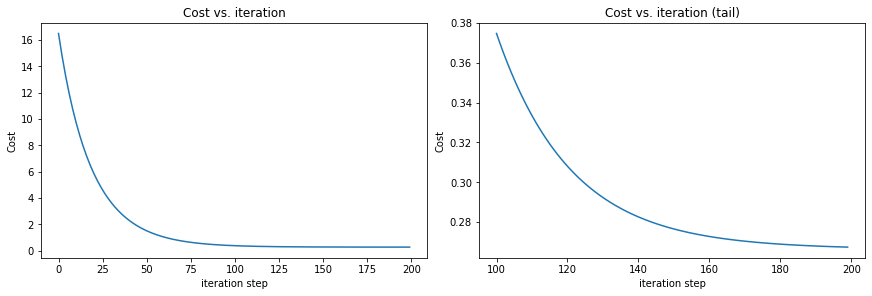

In [24]:

alpha = 2.5e-2
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
m,_ = X_norm.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final}, target value: {y_train[i]}")

print(J_hist)
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()



INFLUENCE DE L'HYPERPARAMETRE ALPHA

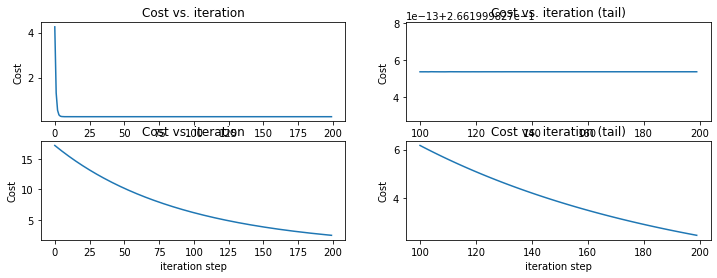

In [25]:
alpha1 = 5.0e-1
alpha2 = 5.0e-3
fig, [[ax1,ax2],[ax3,ax4]]= plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
w_final1, b_final1, J_hist1 = gradient_descent(X_norm, y_train, initial_w, initial_b,alpha1, iterations)
w_final2, b_final2, J_hist2 = gradient_descent(X_norm, y_train, initial_w, initial_b,alpha2, iterations)



ax1.plot(J_hist1)
ax2.plot(100 + np.arange(len(J_hist1[100:])), J_hist1[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 

ax3.plot(J_hist2)
ax4.plot(100 + np.arange(len(J_hist2[100:])), J_hist2[100:])
ax3.set_title("Cost vs. iteration");  ax4.set_title("Cost vs. iteration (tail)")
ax3.set_ylabel('Cost')             ;  ax4.set_ylabel('Cost') 
ax3.set_xlabel('iteration step')   ;  ax4.set_xlabel('iteration step') 
plt.show()

Le premier alpha est trop grand, on risque de sauter l'optimum. Le second est trop petit, on ne l'atteint qu'après un trop grand nombre d'itérations...

TEST DU RESULTAT

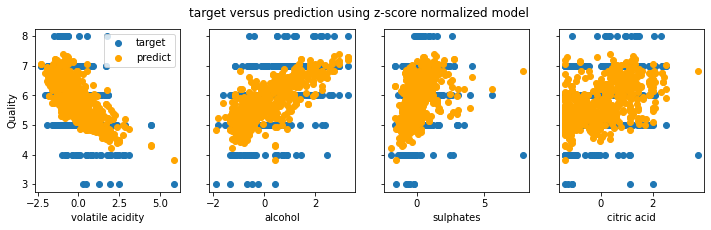

In [26]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final) + b_final

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter([X_norm[:,i]],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter([X_norm[:,i]],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Quality"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

TEST: REGRESSION POLYNOMIALE SI X^n...(utile si on a un [qualité = acide ^ n] par exemple)

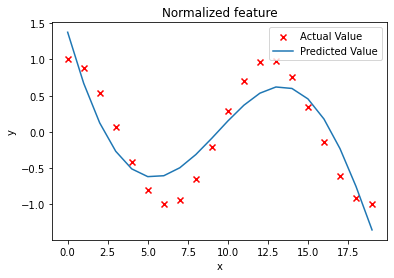

In [27]:
x = np.arange(0,20,1)
y = np.cos(x/2) #ici la valeur actuelle a prédire est cos(x/2)

alpha=0.3
nb_iter=10000
Xn = np.c_[x, x**2, x**3,x**4, x**5, x**6]
Xn_norm,z,r = zscore_normalize_features(Xn) 

b_init = 0
w_init = np.array([ 0,0,0,0,0,0])
initial_w = np.zeros_like(w_init)
initial_b = 0.

w_model, b_model, J_histModel = gradient_descent(Xn_norm, y,initial_w ,initial_b, alpha,nb_iter)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized feature")
plt.plot(x,np.dot(Xn_norm,w_model) + b_model, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()